In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split


In [2]:
X,y=make_blobs(n_samples=2000,n_features=2,cluster_std=3,centers=2,random_state=42)
n_features=2

In [3]:
print(X.shape,y.shape)

(2000, 2) (2000,)


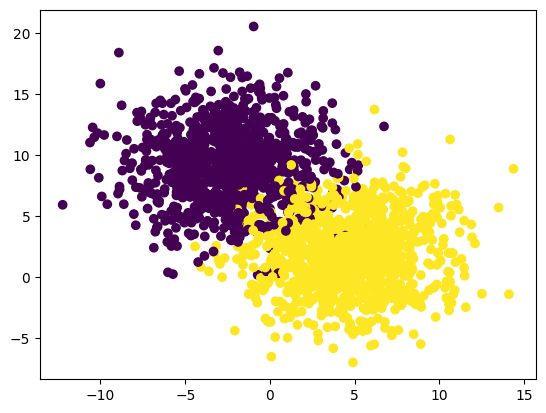

In [4]:
def visualise(X,y):
    plt.scatter(X[:,0],X[:,1],c=y)
    plt.show()
visualise(X,y)

In [5]:
def normalise(X):
    u = X.mean(axis=0)
    std = X.std(axis=0)

    return (X-u)/std 
X=normalise(X)

In [6]:
X

array([[-1.43211741,  0.65078613],
       [-0.47100516,  0.87372191],
       [-0.40182883,  2.1275269 ],
       ...,
       [ 1.96970601, -0.24632291],
       [-0.80805197, -0.01411826],
       [ 0.83964924,  0.53655099]])

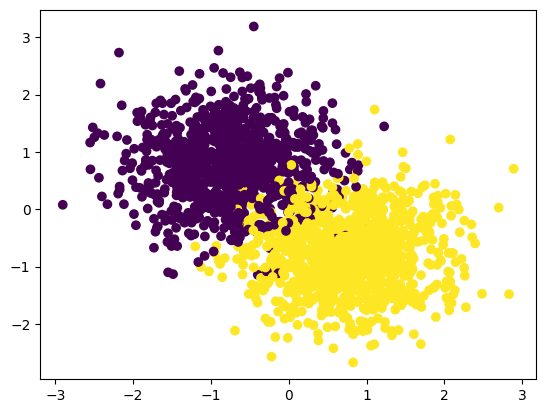

In [7]:
visualise(X,y)

In [8]:
XT,Xt,yT,yt=train_test_split(X,y,test_size=0.25,shuffle=False,random_state=0)

In [9]:
XT.shape

(1500, 2)

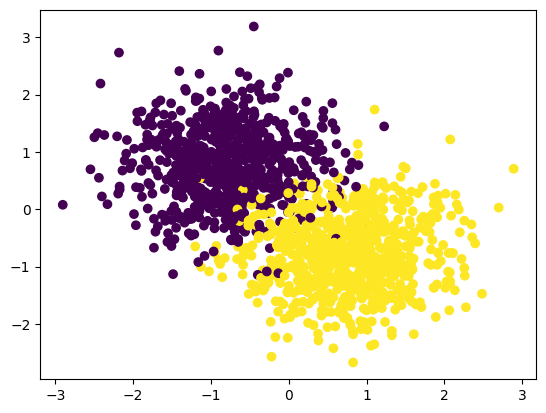

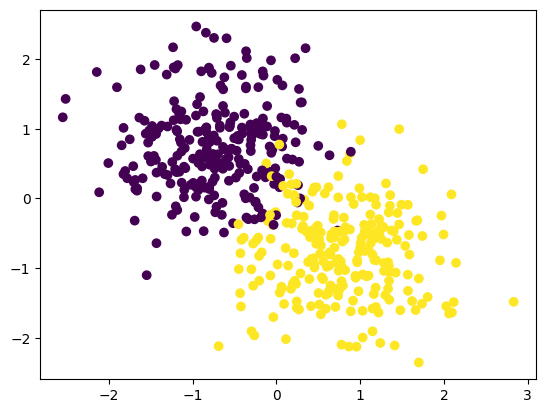

In [10]:
visualise(XT,yT)
visualise(Xt,yt)

In [11]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [12]:
def reprocess(X):
    if X.shape[1] == n_features:
        ones = np.ones((X.shape[0],1))
        X = np.hstack((ones,X))

    return X 
XT=reprocess(XT)
pd.DataFrame(X)

    

,0,1
0,-1.432117,0.650786
1,-0.471005,0.873722
2,-0.401829,2.127527
3,1.430458,-1.565479
4,-1.423143,1.402741
...,...,...
1995,-1.100861,0.123180
1996,-0.928932,0.958663
1997,1.969706,-0.246323
1998,-0.808052,-0.014118


In [23]:
def hypothesis(X,theta):
    return sigmoid(np.dot(X,theta))

# Binary Cross Entropy 
def error(y,yp):
    loss = -np.mean(y*np.log(yp) + (1-y)*np.log(1-yp))
    return loss 
# def hypothesis(X,theta):
#     a=np.dot(X,theta)
#     return sigmoid(a)
# def error(y,yp):
#     loss=-np.mean(y*np.log(yp)-(1-y)(1-np.log(yp)))
#     return loss

(3, 1500)

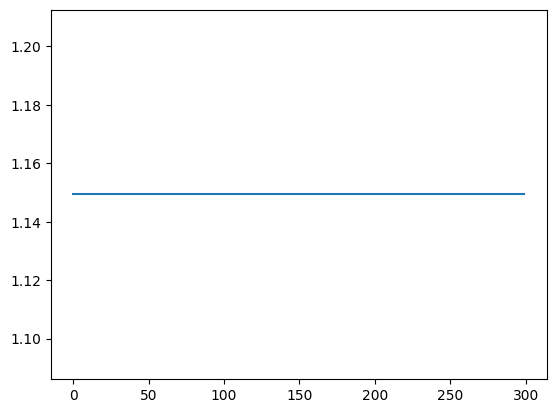

In [35]:
def gradient(X,y,yp):
    m = X.shape[0]
    grad = -(1/m)*np.dot(X.T, (y-yp))
    return grad 
# def gradient(X, y, yp):
#     m = X.shape[0]
#     grad = -1/m * np.dot(X.T, (y - yp))
#     return grad
theta=train(XT,yT)
yp=hypothesis(XT,theta)
grad=gradient(XT,yT,yp)
grad.shape

In [33]:
def train(X,y,max_iters=300,learning_rate=0.):
    
    # Randomly init theta 
    theta = np.random.randn(n_features + 1,1)

    error_list = []

    for i in range(max_iters):
        yp = hypothesis(X,theta)
        e = error(y,yp)
        error_list.append(e)
        grad = gradient(X,y,yp)
        theta = theta - learning_rate*grad 

    plt.plot(error_list)
    return theta 
# def train(X, y, learning_rate=0.1, max_itr=100):


#     theta = np.random.randn(n_features + 1,1)
#     for i in range(max_itr):
#         yp = hypothesis(X, theta)
#         theta = theta - learning_rate * gradient(X, y, yp)

 
#     return theta

array([[ 2.1840014 ,  2.1840014 ,  2.1840014 , ...,  2.1840014 ,
         2.1840014 ,  2.1840014 ],
       [-0.24334294, -0.24334294, -0.24334294, ..., -0.24334294,
        -0.24334294, -0.24334294],
       [-1.32666249, -1.32666249, -1.32666249, ..., -1.32666249,
        -1.32666249, -1.32666249]])

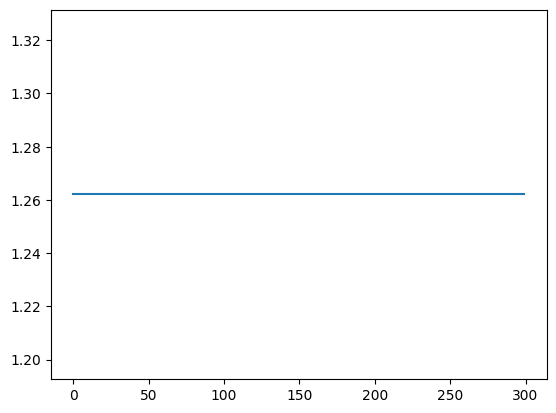

In [34]:
train(XT,yT)

In [274]:
yT.shape

(1500,)

In [275]:
XT.shape

(1500, 3)

In [276]:
X.shape

(2000, 3)